In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv")

In [10]:
df.head()

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Instructor  103 non-null    object 
 1   Final       103 non-null    int64  
 2   Anxiety     103 non-null    float64
 3   Gender      103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [12]:
df[df.duplicated()]

,Instructor,Final,Anxiety,Gender
53,B,20,81.462,Female


In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df[['Instructor', 'Gender']] = df[['Instructor', 'Gender']].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Instructor  102 non-null    category
 1   Final       102 non-null    int64   
 2   Anxiety     102 non-null    float64 
 3   Gender      102 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 2.2 KB


In [17]:
df.corr(numeric_only = True)

,Final,Anxiety
Final,1.000000,-0.412388
Anxiety,-0.412388,1.000000


<Axes: xlabel='Anxiety', ylabel='Final'>

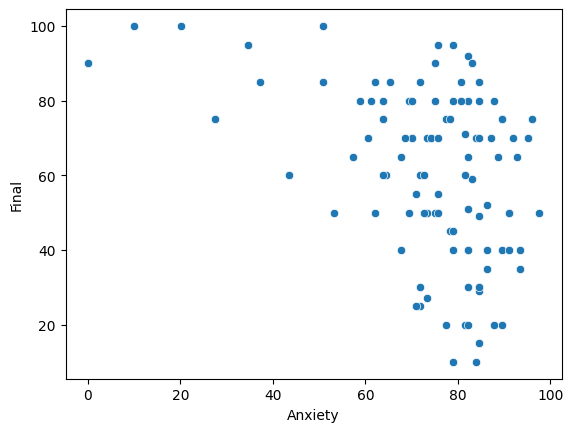

In [20]:
sns.scatterplot(x = df['Anxiety'], y = df['Final'])

In [21]:
numeric_df = df.select_dtypes(include=["number"])
X_num = add_constant(numeric_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i)
                   for i in range(X_num.shape[1])]
vif_data

,feature,VIF
0,const,43.226001
1,Final,1.204912
2,Anxiety,1.204912


In [23]:
X = df.drop('Final', axis = 1)
y = df['Final']

In [24]:
X.shape

(102, 3)

In [29]:
X = pd.get_dummies(X, columns=['Instructor', 'Gender'], drop_first=True)

In [30]:
X.shape

(102, 5)

In [31]:
type(X)

pandas.core.frame.DataFrame

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 print(f"Training set size: {X_train.shape[0]} samples")
 print(f"Testing set size: {X_test.shape[0]} samples")
 type(X_train)
 type(y_train)

Training set size: 81 samples
Testing set size: 21 samples


pandas.core.series.Series

In [33]:
X_train_sm = sm.add_constant(X_train)

In [34]:
X_train_sm

,const,Anxiety,Instructor_B,Instructor_C,Instructor_D,Gender_Male
53,1.0,80.656,True,False,False,True
22,1.0,78.238,False,False,False,False
68,1.0,60.506,False,True,False,False
44,1.0,62.118,True,False,False,False
98,1.0,27.460,False,False,True,False
...,...,...,...,...,...,...
60,1.0,82.268,True,False,False,True
71,1.0,72.596,False,True,False,True
14,1.0,91.940,False,False,False,False
92,1.0,95.970,False,False,True,False


In [ ]:
 X_train_sm = X_train_sm.replace({True: 1, False: 0}).astype(int)

C:\Users\brand\AppData\Local\Temp\ipykernel_7436\393821521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_sm = X_train_sm.replace({True: 1, False: 0}).astype(int)


In [36]:
X_train_sm

,const,Anxiety,Instructor_B,Instructor_C,Instructor_D,Gender_Male
53,1,80,1,0,0,1
22,1,78,0,0,0,0
68,1,60,0,1,0,0
44,1,62,1,0,0,0
98,1,27,0,0,1,0
...,...,...,...,...,...,...
60,1,82,1,0,0,1
71,1,72,0,1,0,1
14,1,91,0,0,0,0
92,1,95,0,0,1,0


In [37]:
 type(X_train_sm)

pandas.core.frame.DataFrame

In [38]:
 ols_model = sm.OLS(y_train,X_train_sm).fit()

In [39]:
 ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.345
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0493
Time:                        12:44:09   Log-Likelihood:                -361.78
No. Observations:                  81   AIC:                             735.6
Df Residuals:                      75   BIC:                             749.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           86.6597     16.864      5.139      0.000      53.066     120.254
Anxiety         -0.4393      0.193     -2.276      0.026      -0.824      -0.055
Instructor_B     2.8784      6.116      0.471      0.639      -9.306      15.063
Instructor_C     5.5415      7.298      0.759      0.450      -8.997      20.080
Instructor_D     7.7416      8.748      0.885      0.379      -9.684      25.168
Gender_Male      2.6009      5.038      0.516      0.607      -7.436      12.638
==============================================================================
Omnibus:                       10.353   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.895
Skew:                          -0.221   Prob(JB):                        0.143
Kurtosis:                       2.021   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
null_model = sm.OLS(y_train, [1 for _ in range(len(y_train))]).fit()
full_model = sm.OLS(y_train, X_train_sm).fit()

In [68]:
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 16 Oct 2025   Prob (F-statistic):                nan
Time:                        13:08:34   Log-Likelihood:                -367.66
No. Observations:                  81   AIC:                             737.3
Df Residuals:                      80   BIC:                             739.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5556      2.532     23.124      0.000      53.516      63.595
==============================================================================
Omnibus:                        8.217   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.206
Skew:                          -0.339   Prob(JB):                        0.122
Kurtosis:                       2.113   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.345
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0493
Time:                        12:46:21   Log-Likelihood:                -361.78
No. Observations:                  81   AIC:                             735.6
Df Residuals:                      75   BIC:                             749.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           86.6597     16.864      5.139      0.000      53.066     120.254
Anxiety         -0.4393      0.193     -2.276      0.026      -0.824      -0.055
Instructor_B     2.8784      6.116      0.471      0.639      -9.306      15.063
Instructor_C     5.5415      7.298      0.759      0.450      -8.997      20.080
Instructor_D     7.7416      8.748      0.885      0.379      -9.684      25.168
Gender_Male      2.6009      5.038      0.516      0.607      -7.436      12.638
==============================================================================
Omnibus:                       10.353   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.895
Skew:                          -0.221   Prob(JB):                        0.143
Kurtosis:                       2.021   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
anova_results = anova_lm(null_model, full_model)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,80.0,41552.000000,0.0,NaN,NaN,NaN
1,75.0,35933.747211,5.0,5618.252789,2.345255,0.049266


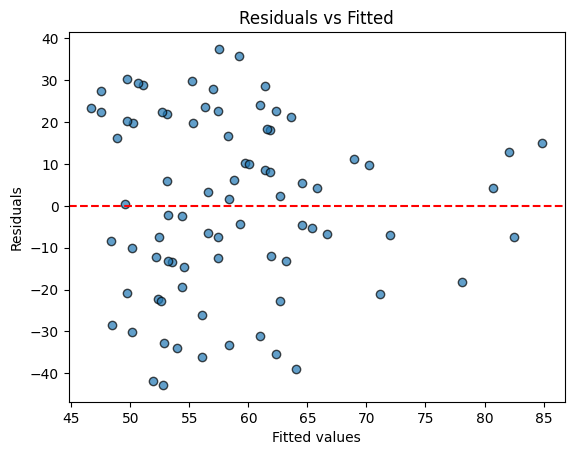

In [46]:
fitted_vals = full_model.fittedvalues
residuals = full_model.resid
plt.scatter(fitted_vals, residuals, alpha=0.7, edgecolor="k")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

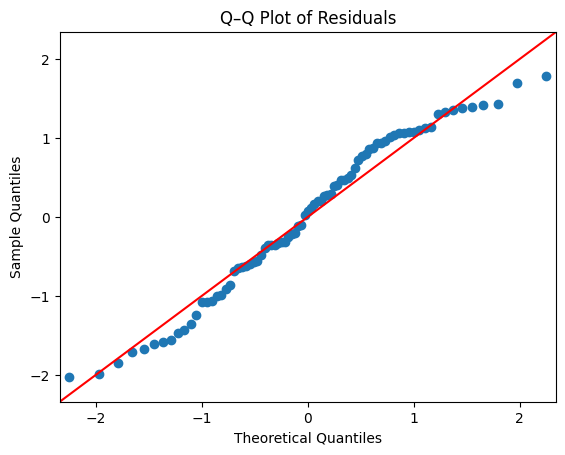

In [47]:
resid = full_model.resid
sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

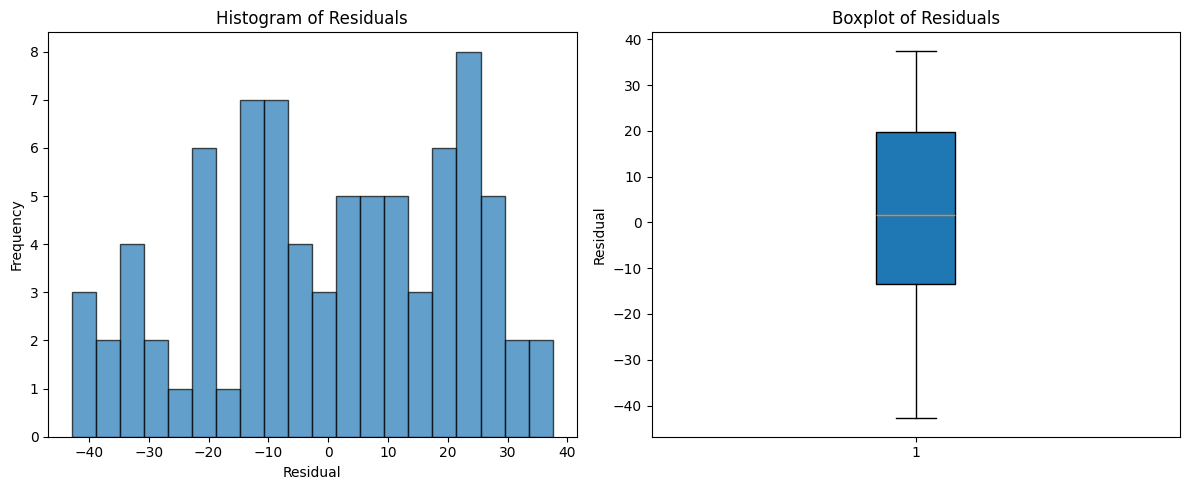

In [48]:
resid = full_model.resid 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(resid, bins=20, edgecolor="k", alpha=0.7)
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual")
axes[0].set_ylabel("Frequency")
axes[1].boxplot(resid, vert=True, patch_artist=True)
axes[1].set_title("Boxplot of Residuals")
axes[1].set_ylabel("Residual")
plt.tight_layout()
plt.show()

In [49]:
resid = full_model.resid
mean_resid = np.mean(resid)
print("Mean of residuals:", mean_resid)

Mean of residuals: 1.674600101933372e-13


In [50]:
scaler = StandardScaler()
X_train[X_train.select_dtypes(include="number").columns] = scaler.fit_transform(X_train.select_dtypes(include="number"))
X_test[X_test.select_dtypes(include="number").columns] = scaler.transform(X_test.select_dtypes(include="number"))

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
feature_names = X.columns
summary_df = pd.DataFrame({
 'Feature': feature_names,
 'Coefficient': model.coef_
 })
summary_df.loc[len(summary_df)] = ['Intercept', model.intercept_]
print(summary_df)

        Feature  Coefficient
0       Anxiety    -6.557424
1  Instructor_B     2.833859
2  Instructor_C     5.547807
3  Instructor_D     7.727237
4   Gender_Male     2.602593
5     Intercept    53.957537


In [53]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, train_predictions)
test_rmse = root_mean_squared_error(y_test, test_predictions)
result_df = pd.DataFrame({
 'Set': ['Training', 'Testing'],
 'RMSE': [train_rmse, test_rmse]
 })

In [54]:
result_df

,Set,RMSE
0,Training,21.057814
1,Testing,18.933635


In [55]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_train_predictions = lasso_model.predict(X_train)
lasso_train_rmse = root_mean_squared_error(y_train, lasso_train_predictions)
lasso_test_predictions = lasso_model.predict(X_test)
lasso_test_rmse = root_mean_squared_error(y_test, lasso_test_predictions)

In [56]:
lasso_coefficients = lasso_model.coef_
feature_names = X.columns
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
 })
print(lasso_coef_df)

        Feature  Coefficient
0       Anxiety    -6.786935
1  Instructor_B     1.523192
2  Instructor_C     3.804095
3  Instructor_D     5.718770
4   Gender_Male     1.990095


In [57]:
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train, y_train)
ridge_train_predictions = ridge_model.predict(X_train)
ridge_train_rmse = root_mean_squared_error(y_train, ridge_train_predictions)
ridge_test_predictions = ridge_model.predict(X_test)
ridge_test_rmse = root_mean_squared_error(y_test, ridge_test_predictions)
ridge_coefficients = ridge_model.coef_
feature_names = X.columns
ridge_coef_df = pd.DataFrame({
 'Feature': feature_names,
 'Coefficient': ridge_coefficients
 })
print(ridge_coef_df)

        Feature  Coefficient
0       Anxiety    -6.574153
1  Instructor_B     2.757235
2  Instructor_C     5.435490
3  Instructor_D     7.577368
4   Gender_Male     2.574377


In [59]:
result_df = pd.DataFrame({
 'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
 'Train RMSE': [train_rmse, lasso_train_rmse, ridge_train_rmse],
 'Test RMSE': [test_rmse, lasso_test_rmse, ridge_test_rmse]
 })
result_df

,Model,Train RMSE,Test RMSE
0,Linear Regression,21.057814,18.933635
1,Lasso Regression,21.070743,19.057534
2,Ridge Regression,21.057870,18.940431


In [60]:
from sklearn.linear_model import LassoCV, RidgeCV
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5).fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5).fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.alpha_)
print("Best alpha for Ridge:", ridge_cv.alpha_)
alphas = np.logspace(-3, 3, 13)
ridge_gs = GridSearchCV(
Ridge(), {"alpha": alphas, "solver": ["auto", "svd", "cholesky", "lsqr", "saga"]},
scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, refit=True
 ).fit(X_train, y_train)
lasso_gs = GridSearchCV(
Lasso(max_iter=5000), {"alpha": alphas, "selection": ["cyclic", "random"], "tol": [1e-4, 1e-3]},
scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, refit=True
).fit(X_train, y_train)
print("Best Ridge α:", ridge_gs.best_params_["alpha"], "CV RMSE:", -ridge_gs.best_score_)
print("Best Lasso α:", lasso_gs.best_params_["alpha"], "CV RMSE:", -lasso_gs.best_score_)
from sklearn.metrics import mean_squared_error
import numpy as np
ridge_rmse = root_mean_squared_error(y_test, ridge_gs.predict(X_test))
lasso_rmse = root_mean_squared_error(y_test, lasso_gs.predict(X_test))
print("Ridge Test RMSE:", ridge_rmse)
print("Lasso Test RMSE:", lasso_rmse)

Best alpha for Lasso: 1.0
Best alpha for Ridge: 100.0
Best Ridge α: 31.622776601683793 CV RMSE: 22.02760351834005
Best Lasso α: 1.0 CV RMSE: 21.85349072697173
Ridge Test RMSE: 19.801214198053437
Lasso Test RMSE: 19.569577089841864


In [61]:
ols = LinearRegression().fit(X_train, y_train)
ols_train_rmse = root_mean_squared_error(y_train, ols.predict(X_train))
ols_test_rmse  = root_mean_squared_error(y_test, ols.predict(X_test))
ols_cv_rmse = None
ridge_train_rmse = root_mean_squared_error(y_train, ridge_gs.predict(X_train))
ridge_test_rmse  = root_mean_squared_error(y_test, ridge_gs.predict(X_test))
ridge_cv_rmse    = -ridge_gs.best_score_  
lasso_train_rmse = root_mean_squared_error(y_train, lasso_gs.predict(X_train))
lasso_test_rmse  = root_mean_squared_error(y_test, lasso_gs.predict(X_test))
lasso_cv_rmse    = -lasso_gs.best_score_
results = pd.DataFrame({
 "Model": ["Linear Regression (OLS)", "Ridge Regression", "Lasso Regression"],
 "Train RMSE": [ols_train_rmse, ridge_train_rmse, lasso_train_rmse],
 "CV RMSE": [ols_cv_rmse, ridge_cv_rmse, lasso_cv_rmse],
 "Test RMSE":  [ols_test_rmse,  ridge_test_rmse,  lasso_test_rmse]
})
print(results)

                     Model  Train RMSE    CV RMSE  Test RMSE
0  Linear Regression (OLS)   21.057814        NaN  18.933635
1         Ridge Regression   21.258861  22.027604  19.801214
2         Lasso Regression   21.231965  21.853491  19.569577


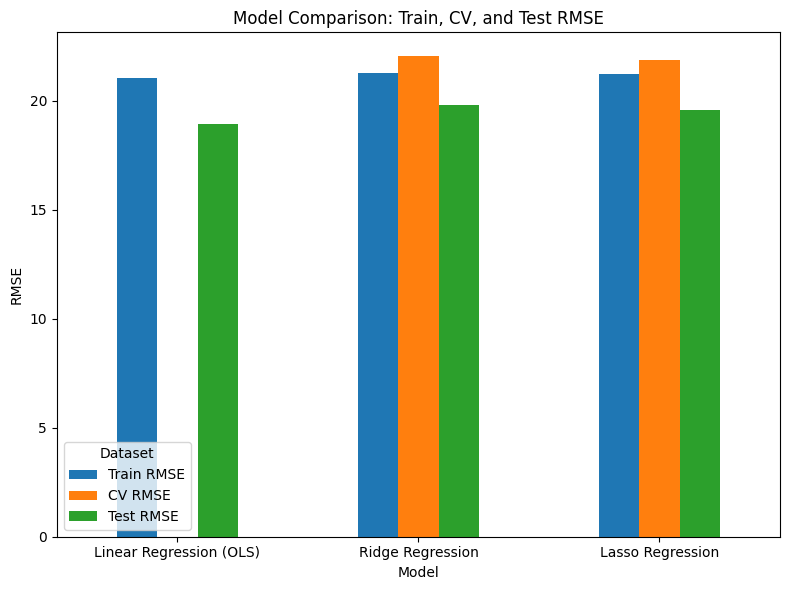

In [63]:
ax = results.set_index("Model")[["Train RMSE", "CV RMSE", "Test RMSE"]].plot(
 kind="bar", figsize=(8,6), rot=0
)
plt.title("Model Comparison: Train, CV, and Test RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.legend(title="Dataset", loc="lower left")
plt.tight_layout()
plt.show()

<Axes: xlabel='Anxiety', ylabel='Final'>

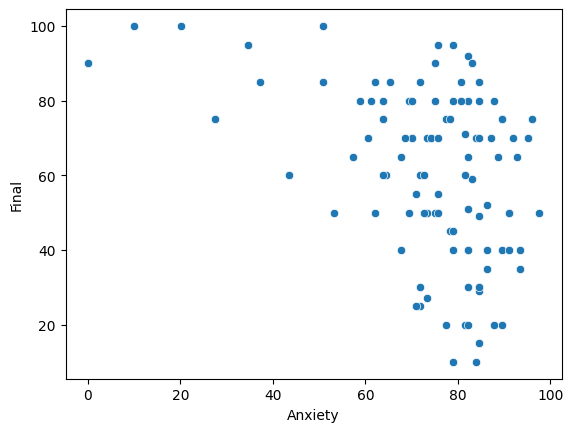

In [64]:
sns.scatterplot(data = df, x = 'Anxiety', y = 'Final')

In [65]:
 df['group'] = np.where(df['Final'] > 50, 'pass', 'fail')

<Axes: xlabel='Anxiety', ylabel='Final'>

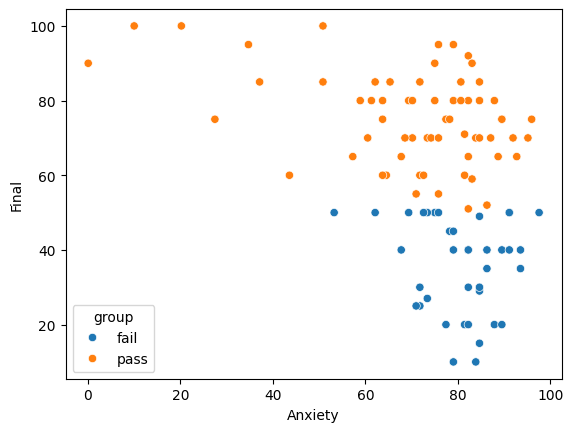

In [66]:
sns.scatterplot(data = df, x = 'Anxiety', y = 'Final', hue = 'group')

Fit the full OLS model with all predictors.
Examine the regression output and identify any predictors with p-values greater than 0.05.
Remove the predictor with the largest p-value above 0.05 and re-fit the model.
Note the AIC value after each re-fit.
Continue this process until all predictors in the model have p-values less than or equal to 0.05.
Select the final model as the one with only significant predictors and the lowest AIC. Then move on to checking model assumptions. 

In [70]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.345
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0493
Time:                        13:15:08   Log-Likelihood:                -361.78
No. Observations:                  81   AIC:                             735.6
Df Residuals:                      75   BIC:                             749.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           86.6597     16.864      5.139      0.000      53.066     120.254
Anxiety         -0.4393      0.193     -2.276      0.026      -0.824      -0.055
Instructor_B     2.8784      6.116      0.471      0.639      -9.306      15.063
Instructor_C     5.5415      7.298      0.759      0.450      -8.997      20.080
Instructor_D     7.7416      8.748      0.885      0.379      -9.684      25.168
Gender_Male      2.6009      5.038      0.516      0.607      -7.436      12.638
==============================================================================
Omnibus:                       10.353   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.895
Skew:                          -0.221   Prob(JB):                        0.143
Kurtosis:                       2.021   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Examine the regression output and identify any predictors with p-values greater than 0.05.
Remove the predictor with the largest p-value above 0.05 and re-fit the model.

p-values > .05
Instructor B
Gender_Male

Remove Instructor B

In [71]:
X_train_step2 = X_train_sm.drop(columns=['Instructor_B'])
model_step2 = sm.OLS(y_train, X_train_step2).fit()
model_step2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.906
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0271
Time:                        13:17:37   Log-Likelihood:                -361.90
No. Observations:                  81   AIC:                             733.8
Df Residuals:                      76   BIC:                             745.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.9478     16.065      5.537      0.000      56.952     120.944
Anxiety         -0.4495      0.191     -2.356      0.021      -0.830      -0.069
Instructor_C     3.9964      6.484      0.616      0.540      -8.919      16.911
Instructor_D     6.0351      7.920      0.762      0.448      -9.739      21.809
Gender_Male      2.6214      5.012      0.523      0.602      -7.361      12.604
==============================================================================
Omnibus:                        9.069   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.755
Skew:                          -0.237   Prob(JB):                        0.153
Kurtosis:                       2.058   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC Dropped from 735.6 to 733.8
p-values > .05 
Instructor_C
Instructor_D
Gender_Male

Remove Gender_Male

In [72]:
X_train_step3 = X_train_step2.drop(columns=['Gender_Male'])
model_step3 = sm.OLS(y_train, X_train_step3).fit()
model_step3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.819
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0132
Time:                        13:21:33   Log-Likelihood:                -362.05
No. Observations:                  81   AIC:                             732.1
Df Residuals:                      77   BIC:                             741.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           91.7059     15.103      6.072      0.000      61.632     121.779
Anxiety         -0.4653      0.188     -2.481      0.015      -0.839      -0.092
Instructor_C     3.2166      6.281      0.512      0.610      -9.290      15.724
Instructor_D     5.4012      7.789      0.693      0.490     -10.110      20.912
==============================================================================
Omnibus:                        8.484   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.702
Skew:                          -0.248   Prob(JB):                        0.157
Kurtosis:                       2.078   Cond. No.                         504.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC Dropped from 733.8 to 732.1
p-values > .05 
Instructor_C
Instructor_D

Remove Instructor_C

In [73]:
X_train_step4 = X_train_step3.drop(columns=['Instructor_C'])
model_step4 = sm.OLS(y_train, X_train_step4).fit()
model_step4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     5.652
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00510
Time:                        13:23:15   Log-Likelihood:                -362.18
No. Observations:                  81   AIC:                             730.4
Df Residuals:                      78   BIC:                             737.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.6839     14.531      6.447      0.000      64.754     122.614
Anxiety         -0.4811      0.184     -2.613      0.011      -0.848      -0.114
Instructor_D     4.3343      7.470      0.580      0.563     -10.538      19.206
==============================================================================
Omnibus:                        8.066   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                3.737
Skew:                          -0.270   Prob(JB):                        0.154
Kurtosis:                       2.097   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC Dropped from 732.1 to 730.4
p-values > .05 
Instructor_D

Remove Instructor_D

In [74]:
X_train_step5 = X_train_step4.drop(columns=['Instructor_D'])
model_step5 = sm.OLS(y_train, X_train_step5).fit()
model_step5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     11.06
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00134
Time:                        13:24:20   Log-Likelihood:                -362.36
No. Observations:                  81   AIC:                             728.7
Df Residuals:                      79   BIC:                             733.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.2443     12.171      8.072      0.000      74.019     122.470
Anxiety       -0.5330      0.160     -3.326      0.001      -0.852      -0.214
==============================================================================
Omnibus:                        7.826   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.692
Skew:                          -0.271   Prob(JB):                        0.158
Kurtosis:                       2.105   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC Dropped from 730.4 to 728.7
No p values > .05

Create the residuals vs fitted plot and interpret the pattern to check linearity and constant variance.

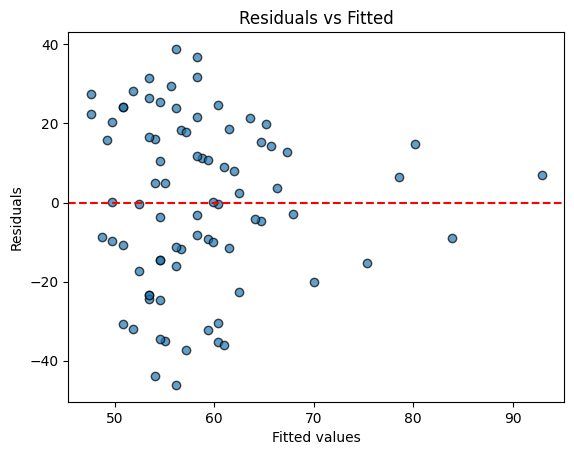

In [75]:
fitted_vals = model_step5.fittedvalues
residuals = model_step5.resid

plt.scatter(fitted_vals, residuals, alpha=0.7, edgecolor="k")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

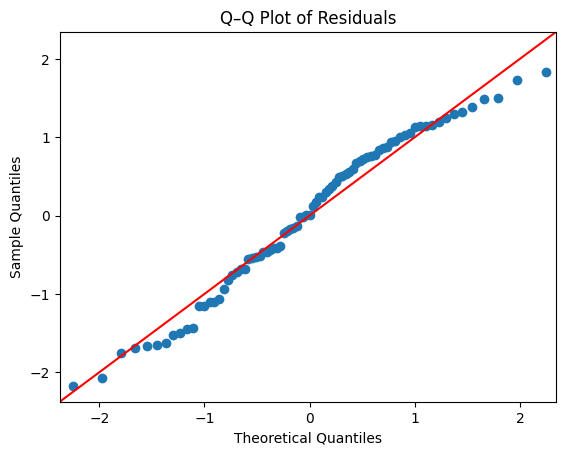

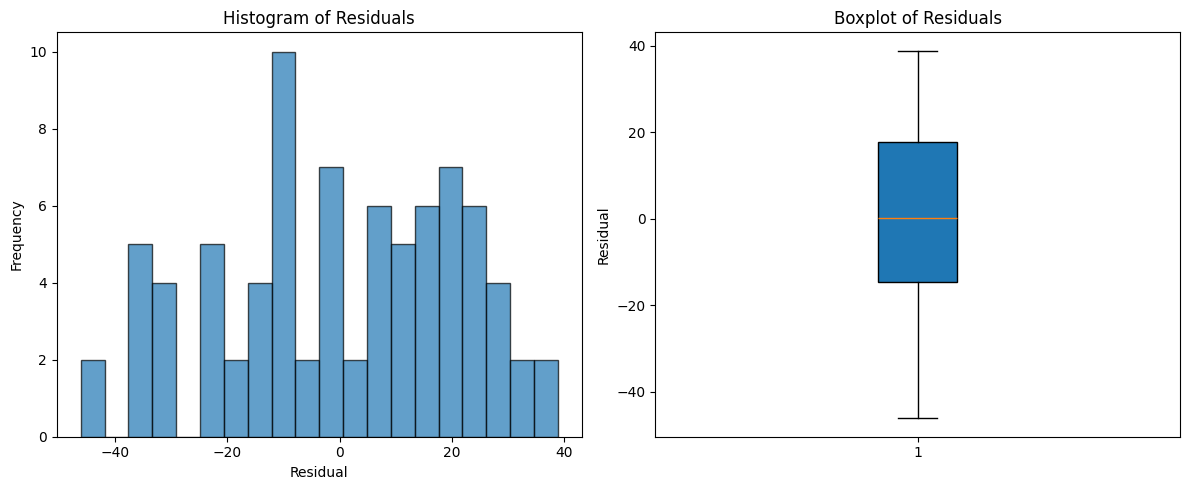

In [76]:
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(residuals, bins=20, edgecolor="k", alpha=0.7)
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual")
axes[0].set_ylabel("Frequency")

axes[1].boxplot(residuals, vert=True, patch_artist=True)
axes[1].set_title("Boxplot of Residuals")
axes[1].set_ylabel("Residual")
plt.tight_layout()
plt.show()


Q-Q Plot: points follow the red line reasonably closely. Residuals are normally distributed.
Histogram: unclear - this does not look evenly distributed to me.
Boxplot: centered around 0, not exactly equally, but close to equally distributed.

In [77]:
mean_resid = np.mean(residuals)
print("Mean of residuals:", mean_resid)

Mean of residuals: 5.0615204757231826e-14
